In [126]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl

path = 'dataset/train.json'

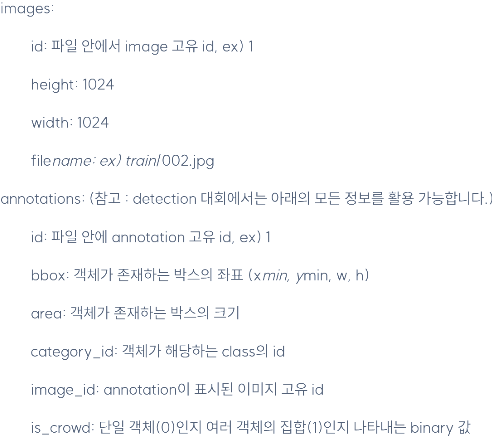

In [127]:
# Load json file
with open(path) as f:
    js = json.loads(f.read())

In [128]:
# annotations dataframe
a_df = pd.json_normalize(js['annotations'])
a_df = a_df.drop(['id', 'image_id'], axis=1) # Drop duplicated Index column
a_df.head(3)

,category_id,area,bbox,iscrowd
0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0
1,3,10402.56,"[0.0, 407.4, 57.6, 180.6]",0
2,7,26259.36,"[0.0, 455.6, 144.6, 181.6]",0


# 1. Category에 따른 sample 갯수 count

In [129]:
for i, v in enumerate(data) :
    print(i+1, v) # 불균형 존재

1 3966
2 6352
3 897
4 936
5 982
6 2943
7 1263
8 5178
9 159
10 468


2. image에 다수의 객체가 존재하는지 확인

In [130]:
a_df['iscrowd'].value_counts() # 0 : 하나의 객체

iscrowd
0    23144
Name: count, dtype: int64

In [131]:
# 'iscrowd' = Usless Column -> drop
a_df = a_df.drop(['iscrowd'], axis=1)

3. Object Size 확인

In [132]:
for _ in range(len(a_df)) :
    box = a_df['bbox'][_]
    box_size = abs(box[2] - box[3]) * abs((box[0]) - box[1])
    a_df.loc[_, 'box_size'] = box_size

In [133]:
a_df[['category_id', 'box_size']].groupby('category_id').var()

,box_size
category_id,
0,2.187831e+09
1,2.170475e+09
2,4.153321e+08
3,1.706661e+09
4,3.318406e+09
5,1.731807e+09
6,2.592122e+09
7,2.191417e+09
8,1.383762e+09


4. Area, box_size를 기준으로 boxplot 생성 -> Outlier 존재하는지

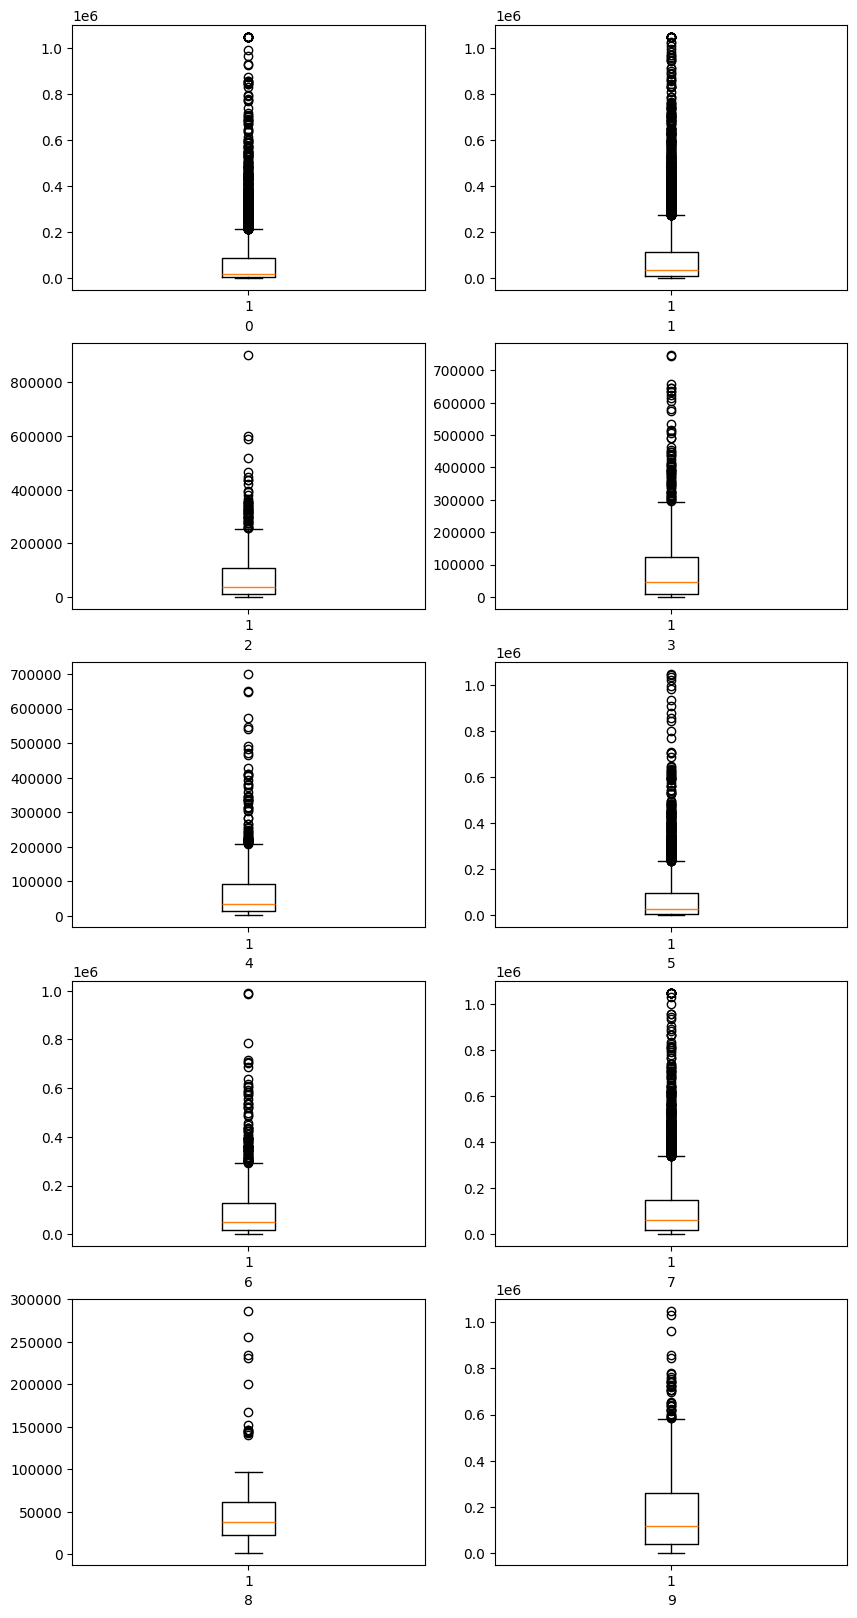

In [134]:
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for n in range(10) :
    plt.subplot(5, 2, n+1)
    plt.boxplot(x='area', data=a_df[a_df['category_id'] == n])
    plt.xlabel(n)

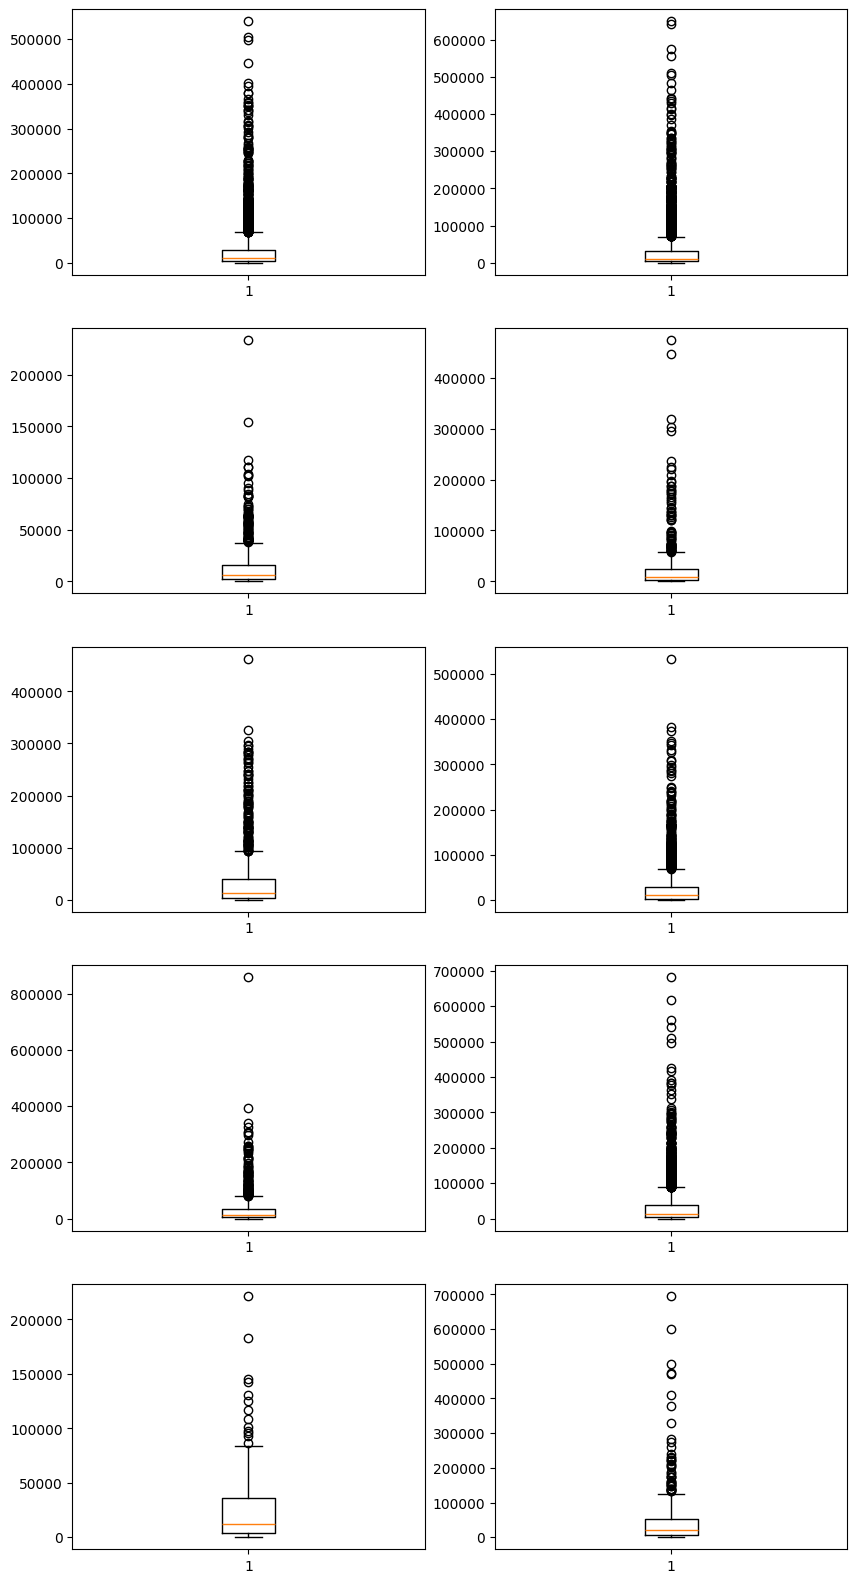

In [135]:
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for n in range(10) :
    plt.subplot(5, 2, n+1)
    plt.boxplot(x='box_size', data=a_df[a_df['category_id'] == n])

In [136]:
a_df[['area', 'box_size']].corr()

,area,box_size
area,1.00000,0.12963
box_size,0.12963,1.00000


결론 : Outlier 너무 많다 -> Diffusion 방향을 통해서 Augmentation 필요해보임